In [2]:
import numpy as np
import scipy.io
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

def dataloader(path):
    data = scipy.io.loadmat(path)
    AF = data['AF']
    modified_rows1 = AF[:-2]
    last_rows1 = AF[-2:]
    CF = data['CF']
    concatenated_array = np.concatenate((modified_rows1, CF,last_rows1), axis=0)
    new=concatenated_array
    u, count = np.unique(new[-1], return_counts=True)
    a = u[np.logical_or(count < 2, count > 2)]
    c = new[:, np.isin(new[-1], a, invert=True)]
    x = c[0:-2]; y = c[-2]; w = c[-1];
    return x.T, y.T, w.T, data['CF_info']

def calculate_accuracy(arr1, arr2):
    count = sum(1 for itr1, itr2 in zip(arr1, arr2) if itr1 == itr2)
    return count / len(arr1)

def normalization(feats):
    df = pd.DataFrame(feats)
    scaler = StandardScaler()
    x_new = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return x_new

def make_partitions(arr_words, arr_labels):
    v = []
    temp = []

    for i in range(len(arr_words) - 1):
        word = arr_words[i]
        next_word = arr_words[i + 1]
        temp.append(arr_labels[i])

        if word != next_word or i == len(arr_words) - 2:
            if i == len(arr_words) - 2:
                temp.append(arr_labels[i + 1])

            numpy_temp = np.array(temp)
            temp_max = np.amax(numpy_temp)
            numpy_temp = np.divide(numpy_temp, temp_max)
            v = np.concatenate((v, numpy_temp), axis=None)
            temp.clear()

    v1 = [1 if i == 1 else 0 for i in v]
    return v1
    
fatyp = 'TypicalFA_comb1'
drivepath = 'finalData/'+ fatyp +'/';
filee = drivepath+'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress.mat'
original_dim = 38
train_path = filee; test_path = filee.replace('train','test')
xtrain, ytrain, wtrain1, info_train1 = dataloader(train_path);
xtest, ytest, wtest1, info_test1 = dataloader(test_path);
xtest= normalization(xtest)
xtrain= normalization(xtrain)

woPP=[]; wPP=[]
input_shape1 = (19,1)
input_shape2 = (38,1)
temperature = 0.03
learning_rate=0.001

2023-06-17 06:23:41.365877: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Impl3ment PCA for Dimensionality Reduction

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(xtrain)

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [4]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
pca = PCA(2)
df = pca.fit_transform(xtrain)
df.shape

(3964, 2)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

## PCA on xtrain with groud truth labels

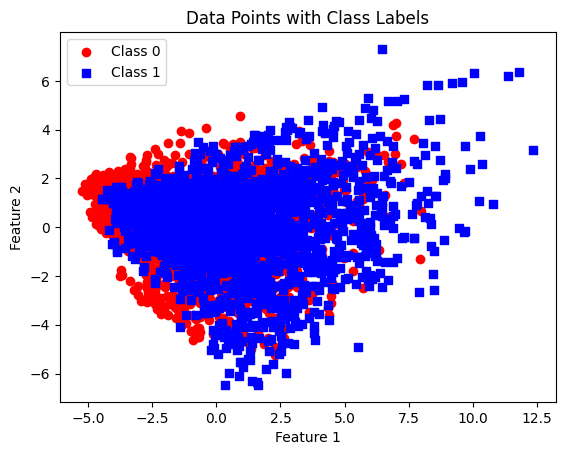

In [7]:
class_0_points = df[ytrain == 0]
class_1_points = df[ytrain == 1]

plt.scatter(class_0_points[:, 0], class_0_points[:, 1], c='red', marker='o', label='Class 0')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], c='blue', marker='s', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points with Class Labels')
plt.legend()
plt.show()

## PCA on xtrain with k-mean cluster labels

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


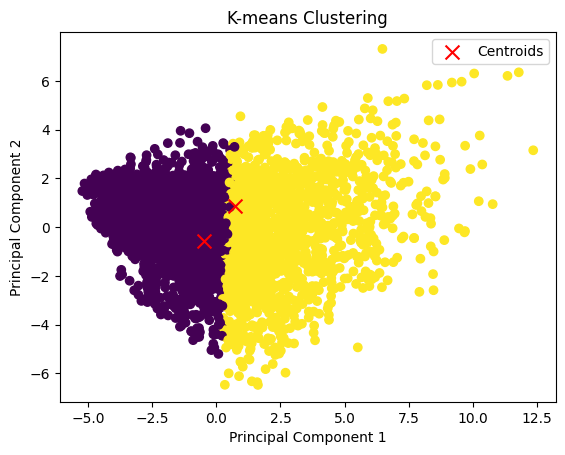

In [7]:
k = 2  # Number of clusters you want to create
kmeans = KMeans(n_clusters=k)
kmeans.fit(xtrain)
labels = kmeans.labels_
from sklearn.decomposition import PCA
# Reduce data to 2 dimensions using PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(xtrain)

# Plot the clusters
centroids = kmeans.cluster_centers_
# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [8]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(xtrain)

# Get the cluster centers
centers = kmeans.cluster_centers_


/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
dist_to_center_1 = np.linalg.norm( xtrain- centers[0], axis=1)
dist_to_center_2 = np.linalg.norm( xtrain - centers[1], axis=1)

In [10]:
labels2 = np.where(dist_to_center_1 < dist_to_center_2, 1, 0)

In [11]:
calculate_accuracy(labels,labels2)

0.9939455095862765

In [12]:
labels

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [13]:
labels2

array([0, 1, 0, ..., 0, 0, 0])

In [14]:
labels2 = np.logical_not(labels2).astype(int)

In [15]:
calculate_accuracy(labels,labels2)

0.006054490413723511

In [15]:
xtrain.shape

(3964, 38)

In [16]:
# Count the number of 1s
count_ones = np.count_nonzero(ytrain == 1)

# Count the number of 0s
count_zeros = np.count_nonzero(ytrain == 0)

# Print the counts
print("Number of 1s:", count_ones)
print("Number of 0s:", count_zeros)

Number of 1s: 1982
Number of 0s: 1982


In [9]:
xtrain=xtrain.to_numpy()

In [26]:
ytrain=ytrain.reshape(3964,1)

In [27]:
labels2=labels2.reshape(3964,1)

In [30]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xtrain)

In [31]:
pca_result.shape

(3964, 2)

In [51]:
xtrain.shape

(3964, 38)

In [56]:
centroids=centroids.T

In [57]:
centroids.shape

(2, 38)

In [48]:

centroids = kmeans.cluster_centers_
dist1c1=np.linalg.norm(xtrain-centroids[0])
dist1c2=np.linalg.norm(xtrain-centroids[1])


In [58]:
distances = np.linalg.norm(xtrain[:, np.newaxis] - centroids, axis=2)

In [ ]:
from scipy.spatial.distance import cdist

In [60]:
distances.shape

(3964, 2)

In [44]:
import pandas as pd

In [61]:
df1 = pd.DataFrame(distances)

In [63]:
xnew1=np.append(ytrain,labels2,axis=1)
xnew=np.append(pca_result,df1,axis=1)
xnew=np.append(xnew,xnew1,axis=1)

In [64]:
import pandas as pd
import numpy as np

# Assuming 'data_clustered' is a properly defined NumPy array

# Convert the NumPy array to a pandas DataFrame
df = pd.DataFrame(xnew)

# Specify the path and filename of the Excel file
excel_file = 'data_clustered.xlsx'

# Save the DataFrame to Excel
df.to_excel(excel_file, index=False)

print("Data saved to", excel_file)


Data saved to data_clustered.xlsx


In [10]:
def initialize_centroids(data, k):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    return centroids

def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments

def update_centroids(data, cluster_assignments, k):
    new_centroids = np.array([data[cluster_assignments == i].mean(axis=0) for i in range(k)])
    return new_centroids

def constrained_kmeans(data, k, max_iterations=100, tolerance=1e-4):
    centroids = initialize_centroids(data, k)
    prev_centroids = centroids.copy()

    for _ in range(max_iterations):
        cluster_assignments = assign_clusters(data, centroids)
        # Enforce the constraint that paired elements must belong to different clusters
        
        for i in range(0, len(cluster_assignments), 2):
            if cluster_assignments[i] == cluster_assignments[i + 1]:
                other_cluster = 1 - cluster_assignments[i]
                dist_to_current = np.linalg.norm(data[i] - centroids[0])
                dist_to_other = np.linalg.norm(data[i] - centroids[1])
                dist_to_current2 = np.linalg.norm(data[i+1] - centroids[0])
                dist_to_other2 = np.linalg.norm(data[i+1] - centroids[1])
                
                min_distance = min(dist_to_current, dist_to_other, dist_to_current2, dist_to_other2)

                if (min_distance==dist_to_current):
                    cluster_assignments[i + 1] = other_cluster
                elif (min_distance==dist_to_current2):
                    cluster_assignments[i] = other_cluster
                elif (min_distance==dist_to_other):
                    cluster_assignments[i] = other_cluster
                else:
                    cluster_assignments[i + 1] = other_cluster

        centroids = update_centroids(data, cluster_assignments, k)

        if np.linalg.norm(prev_centroids - centroids) < tolerance:
            break

        prev_centroids = centroids.copy()

    return centroids, cluster_assignments

k = 2
centroids, cluster_assignments2 = constrained_kmeans(xtrain, k)
print("Centroids:", centroids)
print("Cluster assignments:", cluster_assignments2)

acc=calculate_accuracy(ytrain,cluster_assignments2)
if acc<(0.5):
    labels2 = np.logical_not(cluster_assignments2).astype(int)
else:
    labels2=cluster_assignments2
calculate_accuracy(labels2,ytrain)


Centroids: [[-0.41374282 -0.51507864 -0.39365836 -0.5470777  -0.53776323  0.17139992
  -0.10935987 -0.02824567 -0.72866692 -0.2555052  -0.27053875 -0.27906479
  -0.2625607   0.05868617 -0.16340426 -0.1561139  -0.31112995 -0.56513183
  -0.68786173  0.21943179 -0.21943179  0.01860664 -0.09744101  0.07345994
  -0.0788108  -0.07286019 -0.03465706  0.00914226 -0.04058806 -0.02955032
   0.01496081 -0.01435177 -0.18791811 -0.02015062 -0.14724989 -0.14012379
  -0.30943194  0.30943194]
 [ 0.41374282  0.51507864  0.39365836  0.5470777   0.53776323 -0.17139992
   0.10935987  0.02824567  0.72866692  0.2555052   0.27053875  0.27906479
   0.2625607  -0.05868617  0.16340426  0.1561139   0.31112995  0.56513183
   0.68786173 -0.21943179  0.21943179 -0.01860664  0.09744101 -0.07345994
   0.0788108   0.07286019  0.03465706 -0.00914226  0.04058806  0.02955032
  -0.01496081  0.01435177  0.18791811  0.02015062  0.14724989  0.14012379
   0.30943194 -0.30943194]]
Cluster assignments: [0 1 0 ... 1 0 1]


0.558526740665994

In [48]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=temperature, name=None):
        super(SupervisedContrastiveLoss, self).__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        print(feature_vectors.shape)
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        logits = tf.divide(tf.matmul(feature_vectors_normalized, tf.transpose(feature_vectors_normalized)), self.temperature)
        return 0.35*(tfa.losses.npairs_loss(tf.squeeze(labels), logits))
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa
xtra_a, xval_a, ytra_a, yval_a = train_test_split(xtrain, labels2, test_size=0.2, random_state=42)
input_shape = (38,)
dropout_rate=0.3
batch_size=100
num_epochs=150

def create_classifier(hidden_units):

    # for layer in encoder.layers:
    #     layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)
    # features = encoder(inputs)
    features=layers.Dense(hidden_units, activation="relu")(inputs)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    outputs = layers.Dense(1, activation="sigmoid")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="classifier")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[keras.metrics.BinaryAccuracy()],
    )
    return model

units=64

classifier = create_classifier(units)

# history = classifier.fit(x=xtra_ac, y=ytra_ac, validation_data =(xval_ac,yval_a), batch_size=batch_size, epochs=num_epochs, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])

classifier.summary()
classifier.fit(x=xtra_a, y=ytra_a, validation_data =(xval_a,yval_a), batch_size=batch_size, epochs=num_epochs, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(xtest)
y_pred = np.round(y_pred).flatten()
accuracy = accuracy_score(ytest, y_pred)

from sklearn.metrics import f1_score

f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(xtest)
y_pred = np.round(y_pred).flatten()
accuracy = accuracy_score(ytest, y_pred)

from sklearn.metrics import f1_score

f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy*100)
print("F1 Score:", f1*100)

Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 38)]              0         
                                                                 
 dense_98 (Dense)            (None, 64)                2496      
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_99 (Dense)            (None, 32)                2080      
                                                                 
 dropout_29 (Dropout)        (None, 32)                0         
                                                                 
 dense_100 (Dense)           (None, 32)                1056      
                                                                 
 dense_101 (Dense)           (None, 32)                1

/usr/local/lib/python3.8/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


32/32 [==============================] - 3s 10ms/step - loss: 0.6503 - binary_accuracy: 0.6462 - val_loss: 0.5401 - val_binary_accuracy: 0.7755
Epoch 2/150
32/32 [==============================] - 0s 5ms/step - loss: 0.4880 - binary_accuracy: 0.7862 - val_loss: 0.4527 - val_binary_accuracy: 0.8008
Epoch 3/150
32/32 [==============================] - 0s 6ms/step - loss: 0.4512 - binary_accuracy: 0.8035 - val_loss: 0.4319 - val_binary_accuracy: 0.8058
Epoch 4/150
32/32 [==============================] - 0s 5ms/step - loss: 0.4271 - binary_accuracy: 0.8209 - val_loss: 0.4160 - val_binary_accuracy: 0.8172
Epoch 5/150
32/32 [==============================] - 0s 5ms/step - loss: 0.4102 - binary_accuracy: 0.8225 - val_loss: 0.4023 - val_binary_accuracy: 0.8172
Epoch 6/150
32/32 [==============================] - 0s 6ms/step - loss: 0.3955 - binary_accuracy: 0.8344 - val_loss: 0.3931 - val_binary_accuracy: 0.8235
Epoch 7/150
32/32 [==============================] - 0s 5ms/step - loss: 0.3891 -

# Try with difference in Distance

In [72]:
from sklearn.cluster import KMeans

def constrained_kmeans(data, k):
    kmeans.fit(data)
    centroids = kmeans.cluster_centers_
    cluster_assignments = kmeans.predict(data)
    for i in range(0, len(cluster_assignments), 2):
        if cluster_assignments[i] == cluster_assignments[i + 1]:
            other_cluster = 1 - cluster_assignments[i]
            dist_to_current = np.linalg.norm(data[i] - centroids[0])
            dist_to_other = np.linalg.norm(data[i] - centroids[1])
            dist_to_current2 = np.linalg.norm(data[i+1] - centroids[0])
            dist_to_other2 = np.linalg.norm(data[i+1] - centroids[1])

            dist1=abs(dist_to_current-dist_to_current2)
            dist2=abs(dist_to_other-dist_to_other2)

            if dist1 < dist2:
                cluster_assignments[i + 1] = other_cluster
            else:
                cluster_assignments[i] = other_cluster
    return centroids, cluster_assignments

k = 2
centroids, cluster_assignments = constrained_kmeans(xtrain, k)
acc=calculate_accuracy(ytrain,cluster_assignments)
if acc<(0.5):
    labels2 = np.logical_not(cluster_assignments).astype(int)
else:
    labels2=cluster_assignments
print(labels2)
calculate_accuracy(labels2,ytrain)

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 0 ... 1 0 1]


0.6094853683148335

In [12]:
from sklearn.cluster import KMeans

def constrained_kmeans(data, k):
    kmeans.fit(data)
    centroids = kmeans.cluster_centers_
    cluster_assignments = kmeans.predict(data)
    for i in range(0, len(cluster_assignments), 2):
        if cluster_assignments[i] == cluster_assignments[i + 1]:
            other_cluster = 1 - cluster_assignments[i]
            dist_to_current = np.linalg.norm(data[i] - centroids[0])
            dist_to_other = np.linalg.norm(data[i] - centroids[1])
            dist_to_current2 = np.linalg.norm(data[i+1] - centroids[0])
            dist_to_other2 = np.linalg.norm(data[i+1] - centroids[1])
            
            min_distance = min(dist_to_current, dist_to_other, dist_to_current2, dist_to_other2)

            if (min_distance==dist_to_current):
                cluster_assignments[i + 1] = other_cluster
            elif (min_distance==dist_to_current2):
                cluster_assignments[i] = other_cluster
            elif (min_distance==dist_to_other):
                cluster_assignments[i] = other_cluster
            else:
                cluster_assignments[i + 1] = other_cluster
    return centroids, cluster_assignments

k = 2
centroids, cluster_assignments = constrained_kmeans(xtrain, k)
acc=calculate_accuracy(ytrain,cluster_assignments)
if acc<(0.5):
    labels2 = np.logical_not(cluster_assignments).astype(int)
else:
    labels2=cluster_assignments
print(labels2)
calculate_accuracy(labels2,ytrain)

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 0 ... 0 1 0]


0.6367305751765893

In [13]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=temperature, name=None):
        super(SupervisedContrastiveLoss, self).__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        print(feature_vectors.shape)
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        logits = tf.divide(tf.matmul(feature_vectors_normalized, tf.transpose(feature_vectors_normalized)), self.temperature)
        return 0.35*(tfa.losses.npairs_loss(tf.squeeze(labels), logits))
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa
xtra_a, xval_a, ytra_a, yval_a = train_test_split(xtrain, labels2, test_size=0.2, random_state=42)
input_shape = (38,)
dropout_rate=0.3
batch_size=100
num_epochs=150

def create_classifier(hidden_units):

    # for layer in encoder.layers:
    #     layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)
    # features = encoder(inputs)
    features=layers.Dense(hidden_units, activation="relu")(inputs)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    outputs = layers.Dense(1, activation="sigmoid")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="classifier")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[keras.metrics.BinaryAccuracy()],
    )
    return model

units=64

classifier = create_classifier(units)

# history = classifier.fit(x=xtra_ac, y=ytra_ac, validation_data =(xval_ac,yval_a), batch_size=batch_size, epochs=num_epochs, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])

classifier.summary()
classifier.fit(x=xtra_a, y=ytra_a, validation_data =(xval_a,yval_a), batch_size=batch_size, epochs=num_epochs, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(xtest)
y_pred = np.round(y_pred).flatten()
accuracy = accuracy_score(ytest, y_pred)

from sklearn.metrics import f1_score

f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(xtest)
y_pred = np.round(y_pred).flatten()
accuracy = accuracy_score(ytest, y_pred)

from sklearn.metrics import f1_score

f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy*100)
print("F1 Score:", f1*100)

/project/.local/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2023-06-16 07:39:05.893089: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense (Dense)               (None, 64)                2496      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1

2023-06-16 07:39:05.898133: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-16 07:39:05.898352: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-16 07:39:05.899812: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/150


/usr/local/lib/python3.8/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2023-06-16 07:39:08.504544: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x21b9f600 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-06-16 07:39:08.504579: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2023-06-16 07:39:08.511075: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-16 07:39:08.717700: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-06-16 07:39:08.852792: I ./tensorflow/compiler/jit/device_compi

32/32 [==============================] - 4s 10ms/step - loss: 0.6733 - binary_accuracy: 0.5358 - val_loss: 0.5954 - val_binary_accuracy: 0.6835
Epoch 2/150
32/32 [==============================] - 0s 5ms/step - loss: 0.5864 - binary_accuracy: 0.7114 - val_loss: 0.5238 - val_binary_accuracy: 0.7654
Epoch 3/150
32/32 [==============================] - 0s 5ms/step - loss: 0.5161 - binary_accuracy: 0.7613 - val_loss: 0.4787 - val_binary_accuracy: 0.7718
Epoch 4/150
32/32 [==============================] - 0s 5ms/step - loss: 0.5031 - binary_accuracy: 0.7666 - val_loss: 0.4732 - val_binary_accuracy: 0.7768
Epoch 5/150
32/32 [==============================] - 0s 5ms/step - loss: 0.4850 - binary_accuracy: 0.7821 - val_loss: 0.4516 - val_binary_accuracy: 0.7894
Epoch 6/150
32/32 [==============================] - 0s 5ms/step - loss: 0.4739 - binary_accuracy: 0.7755 - val_loss: 0.4413 - val_binary_accuracy: 0.7806
Epoch 7/150
32/32 [==============================] - 0s 5ms/step - loss: 0.4609 -

In [32]:
from sklearn.cluster import KMeans

def constrained_kmeans(data, k):
    kmeans.fit(data)
    centroids = kmeans.cluster_centers_
    cluster_assignments = kmeans.predict(data)
    for i in range(0, len(cluster_assignments), 2):
        if cluster_assignments[i] == cluster_assignments[i + 1]:
            other_cluster = 1 - cluster_assignments[i]
            dist_to_current = np.linalg.norm(data[i] - centroids[0])
            dist_to_other = np.linalg.norm(data[i] - centroids[1])
            dist_to_current2 = np.linalg.norm(data[i+1] - centroids[0])
            dist_to_other2 = np.linalg.norm(data[i+1] - centroids[1])
            
            max_distance = max(dist_to_current, dist_to_other, dist_to_current2, dist_to_other2)

            if (max_distance==dist_to_current):
                cluster_assignments[i] = other_cluster
            elif (max_distance==dist_to_current2):
                cluster_assignments[i+1] = other_cluster
            elif (max_distance==dist_to_other):
                cluster_assignments[i+1] = other_cluster
            else:
                cluster_assignments[i] = other_cluster
    return centroids, cluster_assignments

k = 2
centroids, cluster_assignments = constrained_kmeans(xtrain, k)
acc=calculate_accuracy(ytrain,cluster_assignments)
if acc<(0.5):
    labels2 = np.logical_not(cluster_assignments).astype(int)
else:
    labels2=cluster_assignments
print(labels2)
calculate_accuracy(labels2,ytrain)
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=temperature, name=None):
        super(SupervisedContrastiveLoss, self).__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        print(feature_vectors.shape)
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        logits = tf.divide(tf.matmul(feature_vectors_normalized, tf.transpose(feature_vectors_normalized)), self.temperature)
        return 0.35*(tfa.losses.npairs_loss(tf.squeeze(labels), logits))
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa
xtra_a, xval_a, ytra_a, yval_a = train_test_split(xtrain, labels2, test_size=0.2, random_state=42)
input_shape = (38,)
dropout_rate=0.3
batch_size=100
num_epochs=150

def create_classifier(hidden_units):

    # for layer in encoder.layers:
    #     layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)

    # features = encoder(inputs)
    features=layers.Dense(hidden_units, activation="relu")(inputs)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    outputs = layers.Dense(1, activation="sigmoid")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="classifier")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[keras.metrics.BinaryAccuracy()],
    )
    return model

units=64

classifier = create_classifier(units)

# history = classifier.fit(x=xtra_ac, y=ytra_ac, validation_data =(xval_ac,yval_a), batch_size=batch_size, epochs=num_epochs, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])

classifier.summary()
classifier.fit(x=xtra_a, y=ytra_a, validation_data =(xval_a,yval_a), batch_size=batch_size, epochs=num_epochs, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(xtest)
y_pred = np.round(y_pred).flatten()
accuracy = accuracy_score(ytest, y_pred)

from sklearn.metrics import f1_score

f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(xtest)
y_pred = np.round(y_pred).flatten()
accuracy = accuracy_score(ytest, y_pred)

from sklearn.metrics import f1_score

f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy*100)
print("F1 Score:", f1*100)

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 0 ... 0 0 1]
Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense_14 (Dense)            (None, 64)                2496      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dense_17 (Dense)            (None, 32

/usr/local/lib/python3.8/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


32/32 [==============================] - 3s 11ms/step - loss: 0.6657 - binary_accuracy: 0.6146 - val_loss: 0.5837 - val_binary_accuracy: 0.7528
Epoch 2/150
32/32 [==============================] - 0s 6ms/step - loss: 0.5283 - binary_accuracy: 0.7436 - val_loss: 0.4499 - val_binary_accuracy: 0.8058
Epoch 3/150
32/32 [==============================] - 0s 6ms/step - loss: 0.4753 - binary_accuracy: 0.7808 - val_loss: 0.4286 - val_binary_accuracy: 0.8134
Epoch 4/150
32/32 [==============================] - 0s 6ms/step - loss: 0.4602 - binary_accuracy: 0.7871 - val_loss: 0.4128 - val_binary_accuracy: 0.8235
Epoch 5/150
32/32 [==============================] - 0s 6ms/step - loss: 0.4467 - binary_accuracy: 0.7979 - val_loss: 0.4013 - val_binary_accuracy: 0.8260
Epoch 6/150
32/32 [==============================] - 0s 6ms/step - loss: 0.4294 - binary_accuracy: 0.8016 - val_loss: 0.3899 - val_binary_accuracy: 0.8323
Epoch 7/150
32/32 [==============================] - 0s 6ms/step - loss: 0.4241 -

In [58]:
from sklearn.manifold import TSNE

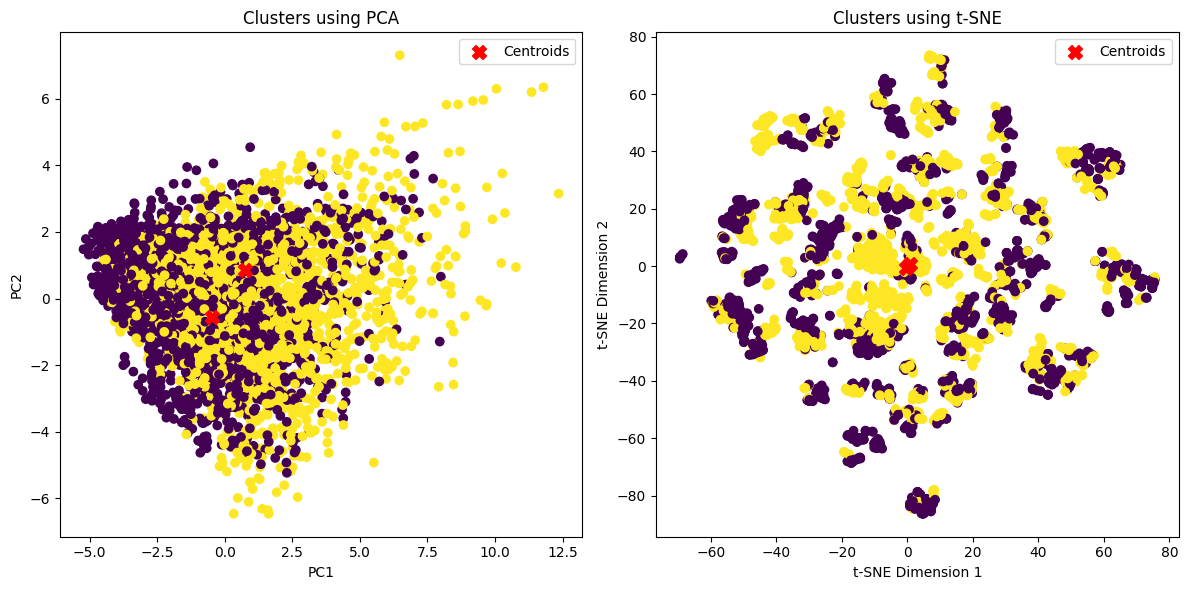

In [53]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xtrain)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xtrain)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=ytrain, cmap='viridis')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=ytrain, cmap='viridis')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

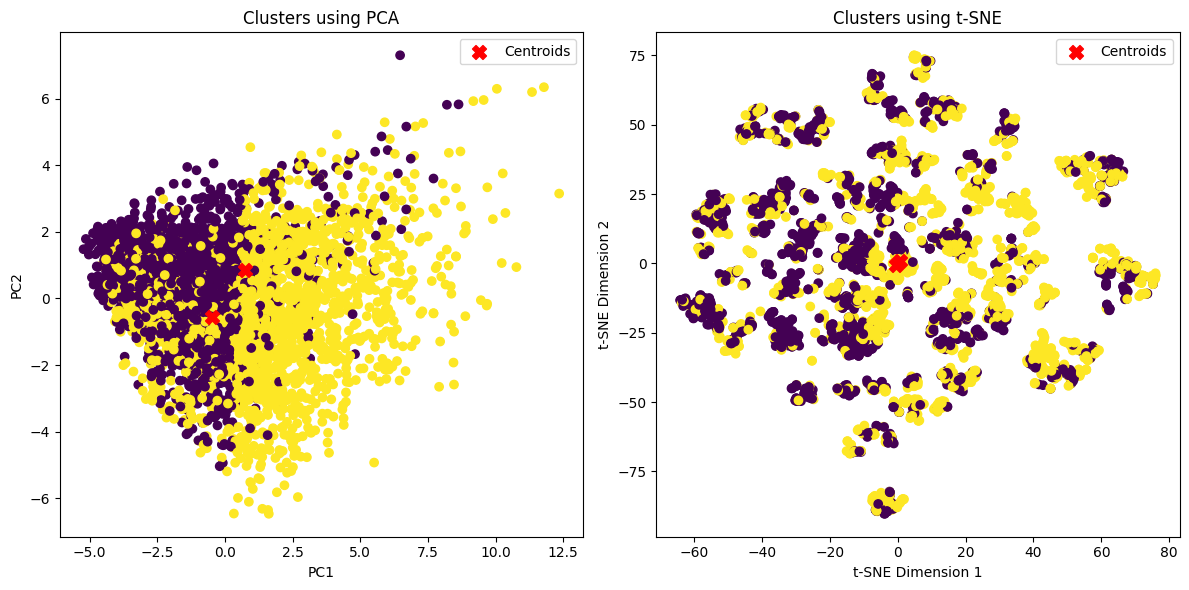

In [59]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xtrain)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xtrain)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels2, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels2, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Clusters using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Implementing Contrastive Loss (N-Pair)

In [60]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense

In [61]:
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=temperature, name=None):
        super(SupervisedContrastiveLoss, self).__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        print(feature_vectors.shape)
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        logits = tf.divide(tf.matmul(feature_vectors_normalized, tf.transpose(feature_vectors_normalized)), self.temperature)
        return 0.35*(tfa.losses.npairs_loss(tf.squeeze(labels), logits))

In [77]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Input, Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa
xtra_a, xval_a, ytra_a, yval_a = train_test_split(xtrain, labels2, test_size=0.2, random_state=42)
input_shape = (38,)
dropout_rate=0.3
batch_size=100
num_epochs=150

In [78]:

def create_classifier(hidden_units):

    # for layer in encoder.layers:
    #     layer.trainable = trainable

    inputs = keras.Input(shape=input_shape)
    # features = encoder(inputs)
    features=layers.Dense(hidden_units, activation="relu")(inputs)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dropout(dropout_rate)(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    features = layers.Dense(hidden_units//2, activation="relu")(features)
    outputs = layers.Dense(1, activation="sigmoid")(features)

    model = keras.Model(inputs=inputs, outputs=outputs, name="classifier")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.BinaryCrossentropy(from_logits=True),
        metrics=[keras.metrics.BinaryAccuracy()],
    )
    return model

units=64

classifier = create_classifier(units)

# history = classifier.fit(x=xtra_ac, y=ytra_ac, validation_data =(xval_ac,yval_a), batch_size=batch_size, epochs=num_epochs, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])


In [79]:
classifier.summary()
classifier.fit(x=xtra_a, y=ytra_a, validation_data =(xval_a,yval_a), batch_size=batch_size, epochs=num_epochs, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(xtest)
y_pred = np.round(y_pred).flatten()
accuracy = accuracy_score(ytest, y_pred)

from sklearn.metrics import f1_score

f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 38)]              0         
                                                                 
 dense_30 (Dense)            (None, 64)                2496      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_32 (Dense)            (None, 32)                1056      
                                                                 
 dense_33 (Dense)            (None, 32)                1

/usr/local/lib/python3.8/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


32/32 [==============================] - 4s 12ms/step - loss: 0.6807 - binary_accuracy: 0.5777 - val_loss: 0.6232 - val_binary_accuracy: 0.7629
Epoch 2/150
32/32 [==============================] - 0s 7ms/step - loss: 0.5796 - binary_accuracy: 0.7162 - val_loss: 0.4907 - val_binary_accuracy: 0.7907
Epoch 3/150
32/32 [==============================] - 0s 8ms/step - loss: 0.5269 - binary_accuracy: 0.7509 - val_loss: 0.4628 - val_binary_accuracy: 0.8083
Epoch 4/150
32/32 [==============================] - 0s 7ms/step - loss: 0.5060 - binary_accuracy: 0.7663 - val_loss: 0.4529 - val_binary_accuracy: 0.7995
Epoch 5/150
32/32 [==============================] - 0s 7ms/step - loss: 0.4897 - binary_accuracy: 0.7666 - val_loss: 0.4545 - val_binary_accuracy: 0.7995
Epoch 6/150
32/32 [==============================] - 0s 8ms/step - loss: 0.4766 - binary_accuracy: 0.7789 - val_loss: 0.4395 - val_binary_accuracy: 0.7995
Epoch 7/150
32/32 [==============================] - 0s 7ms/step - loss: 0.4729 -

In [81]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(xtest)
y_pred = np.round(y_pred).flatten()
accuracy = accuracy_score(ytest, y_pred)

from sklearn.metrics import f1_score

f1 = f1_score(ytest, y_pred)

print("Accuracy:", accuracy*100)
print("F1 Score:", f1*100)

103/103 [==============================] - 0s 2ms/step
Accuracy: 57.42665036674816
F1 Score: 58.578650014867684


# Upto Here only

In [82]:
trainoutputs = encoder_with_projection_head.predict(xtrain)

124/124 [==============================] - 0s 1ms/step


## TSNE FOR ENCODER ON TRAIN WITH GROUND TRUTH

In [83]:
tsne = TSNE(n_components=2, random_state=42)
projections = tsne.fit_transform(trainoutputs)
# Plot the projections
plt.scatter(projections[:, 0], projections[:, 1],c=ytrain)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Projections')
plt.show()

NameError: name 'TSNE' is not defined

## TSNE FOR ENCODER ON TRAIN WITH K-Mean Labels

In [71]:
k = 2  # Number of clusters you want to create
kmeans = KMeans(n_clusters=k)
kmeans.fit(trainoutputs)

# Step 3: Get cluster labels for each example
labels = kmeans.labels_

# Step 4: Reduce data to 2 dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(trainoutputs)

# Step 5: Get cluster centroids
centroids = kmeans.cluster_centers_

# Step 6: Plot the clusters and centroids
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

NameError: name 'trainoutputs' is not defined

# PCA FOR ENCODER ON TRAIN

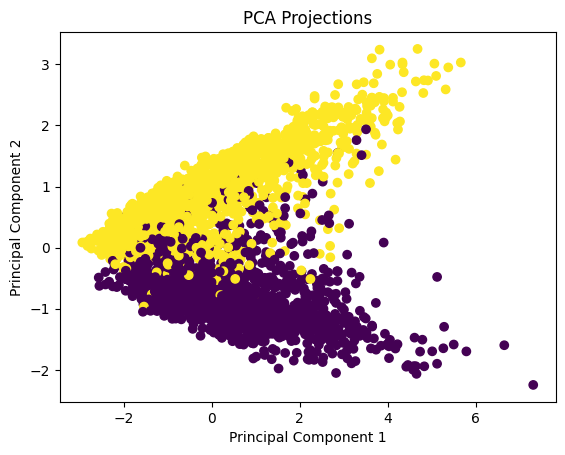

In [92]:
pca = PCA(n_components=2, random_state=42)
projections = pca.fit_transform(trainoutputs)
# Plot the projections
plt.scatter(projections[:, 0], projections[:, 1],c=ytrain)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projections')
plt.show()

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


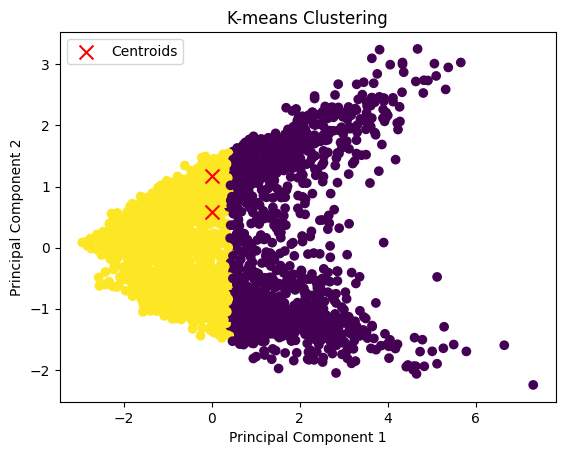

In [93]:
k = 2  # Number of clusters you want to create
kmeans = KMeans(n_clusters=k)
kmeans.fit(trainoutputs)
labels = kmeans.labels_
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions using PCA
pca = PCA(n_components=2,random_state=42)
reduced_data = pca.fit_transform(trainoutputs)

# Plot the clusters
centroids = kmeans.cluster_centers_
# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


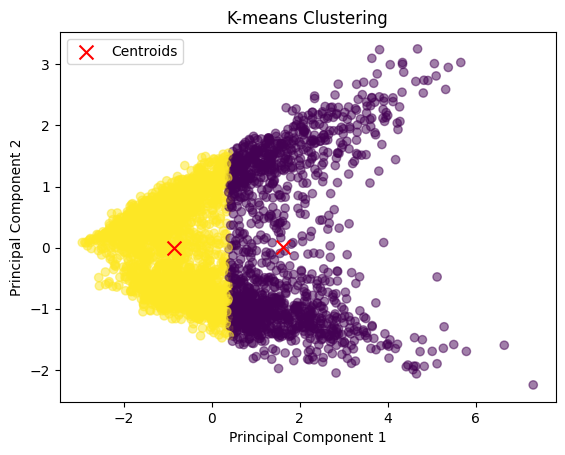

In [94]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(reduced_data)

# Step 3: Get cluster labels for each example
labels = kmeans.labels_

# Step 4: Reduce data to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(reduced_data)

# Step 5: Get cluster centroids
centroids = kmeans.cluster_centers_

# Step 6: Plot the clusters and centroids
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# TSNE FOR ENCODER ON TEST

In [95]:
testoutputs = encoder_with_projection_head.predict(xtest)

103/103 [==============================] - 0s 2ms/step


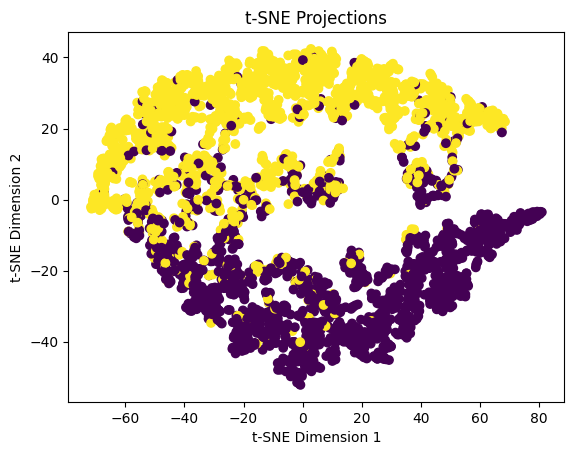

In [96]:
tsne = TSNE(n_components=2, random_state=42)
projections = tsne.fit_transform(testoutputs)
# Plot the projections
plt.scatter(projections[:, 0], projections[:, 1],c=ytest)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Projections')
plt.show()

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


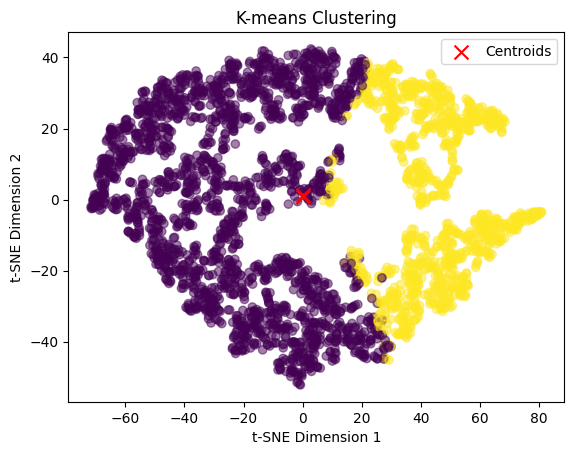

In [97]:
k = 2  # Number of clusters you want to create
kmeans = KMeans(n_clusters=k)
kmeans.fit(testoutputs)

# Step 3: Get cluster labels for each example
labels = kmeans.labels_

# Step 4: Reduce data to 2 dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(testoutputs)

# Step 5: Get cluster centroids
centroids = kmeans.cluster_centers_

# Step 6: Plot the clusters and centroids
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

# PCA FOR ENCODER ON TEST

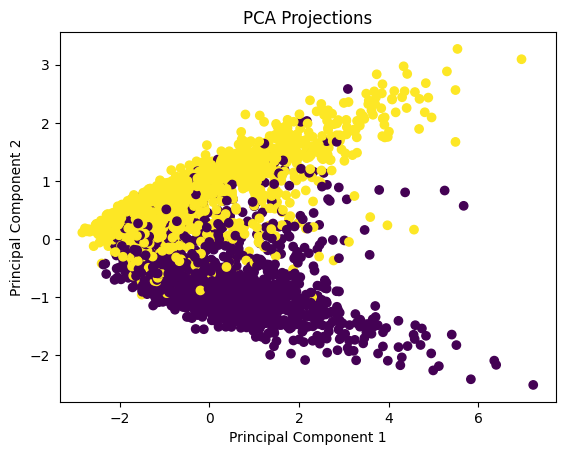

In [98]:
pca = PCA(n_components=2, random_state=42)
projections = pca.fit_transform(testoutputs)
# Plot the projections
plt.scatter(projections[:, 0], projections[:, 1],c=ytest)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projections')
plt.show()

/project/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


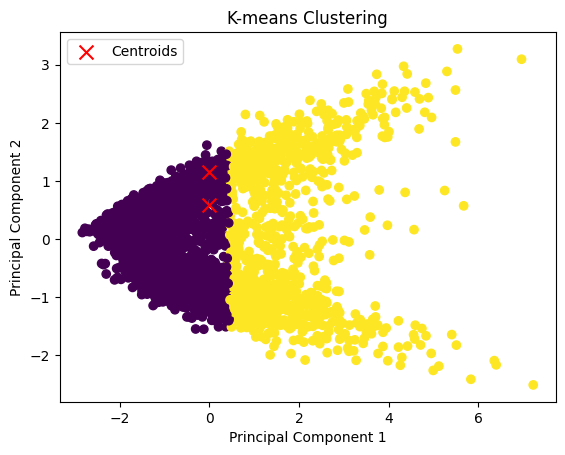

In [99]:
k = 2  # Number of clusters you want to create
kmeans = KMeans(n_clusters=k)
kmeans.fit(testoutputs)
labels = kmeans.labels_
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions using PCA
pca = PCA(n_components=2,random_state=42)
reduced_data = pca.fit_transform(testoutputs)

# Plot the clusters
centroids = kmeans.cluster_centers_
# Plot the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Output of encoder as 2

In [100]:
class Encoder(Model):
  def __init__(self, latent_dim):
    super(Encoder, self).__init__()
    self.latent_dim = latent_dim 
    inputs = Input(shape=(38,1))
    outputs = inputs  
    self.encoder = tf.keras.Sequential([
      inputs,
      
      layers.Conv1D(filters=64, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Dropout(0.5),
      layers.Conv1D(filters=32, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Conv1D(filters=16, kernel_size=2, activation='relu'),
      layers.MaxPooling1D(pool_size=1),
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])

  def call(self, x):
    encoded = self.encoder(x)
    return encoded
latent_dim=30

def create_encoder():
    return Encoder(latent_dim)


def add_projection_head(Encoder):
    inp = keras.Input(shape=input_shape)
    hidden  = Encoder(inp)
    features = layers.Dense(4, activation="relu")(hidden)
    features = layers.Dense(2, activation="softmax")(features)
    model = keras.Model(
        inputs=inp, outputs=features, name="cifar-encoder_with_projection-head"
    )
    return model
input_shape = (38,1)
from keras.callbacks import ModelCheckpoint, EarlyStopping
import tensorflow_addons as tfa
encoder = create_encoder()
encoder_with_projection_head = add_projection_head(encoder)
encoder_with_projection_head.compile(optimizer=keras.optimizers.Adam(learning_rate),loss=SupervisedContrastiveLoss(temperature))
encoder_with_projection_head.summary()
history = encoder_with_projection_head.fit(xtra_a, ytra_a , validation_data =(xval_a,yval_a), batch_size=32, epochs=100, callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)])


Model: "cifar-encoder_with_projection-head"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 38, 1)]           0         
                                                                 
 encoder_3 (Encoder)         (None, 30)                22190     
                                                                 
 dense_6 (Dense)             (None, 4)                 124       
                                                                 
 dense_7 (Dense)             (None, 2)                 10        
                                                                 
Total params: 22,324
Trainable params: 22,324
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
(None, 2)
(None, 2)
100/100 [==============================] - 3s 7ms/step - loss: 1.2002 - val_loss: 1.1821
Epoch 2/100
100/100 [==================

In [101]:
trainoutputs = encoder_with_projection_head.predict(xtrain)

124/124 [==============================] - 0s 2ms/step


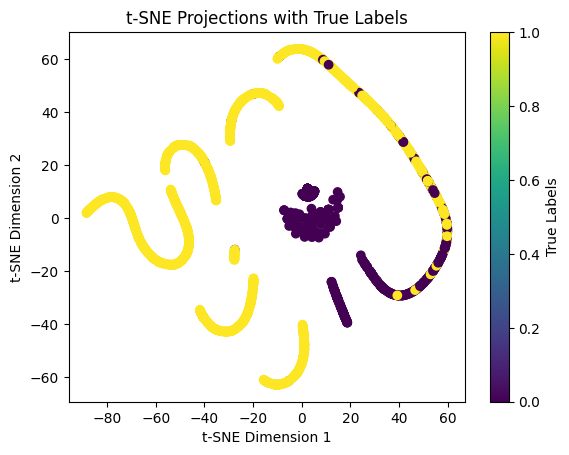

In [102]:
tsne = TSNE(n_components=2, random_state=42)
projections = tsne.fit_transform(trainoutputs)

# Plot the projections with true labels
plt.scatter(projections[:, 0], projections[:, 1], c=ytrain)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Projections with True Labels')
plt.colorbar(label='True Labels')
plt.show()

In [103]:
testoutputs = encoder_with_projection_head.predict(xtest)

103/103 [==============================] - 0s 2ms/step


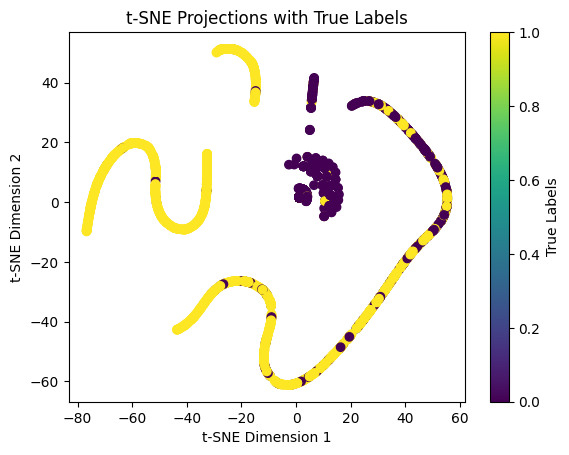

In [104]:
tsne = TSNE(n_components=2, random_state=42)
projections = tsne.fit_transform(testoutputs)
plt.scatter(projections[:, 0], projections[:, 1], c=ytest)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Projections with True Labels')
plt.colorbar(label='True Labels')
plt.show()